In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Creating a list of countries to make models of 
country_list_sol = ['DE','DK_1','GB_GBN','SE'] #Germany,Denmark ,Great Britain,Sweden 
country_list_rad = ['DE','DK','GB','SE']
solar_gen_data_list =[]
radiation_data_list = []

In [3]:
solar_gen_data_list = []
# energygenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)

# windgenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s. startswith('DE_wind_generation')),
#                         parse_dates=[0], index_col=0)

for i in country_list_sol:
    column_name = i +"_solar_generation_actual"
    solargenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 (s.startswith(column_name) &
                                  s.endswith("generation_actual"))),
                        parse_dates=[0], index_col=0)
    
    solar_gen_data_list.append(solargenerationdata)

#solargenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
 #                       usecols=(lambda s: s.startswith('utc') | 
  ##                     parse_dates=[0], index_col=0)


In [4]:
print(len(solar_gen_data_list))
for i in solar_gen_data_list:
    print(i)

4
                           DE_solar_generation_actual
utc_timestamp                                        
2004-12-31 23:00:00+00:00                         NaN
2005-01-01 00:00:00+00:00                         NaN
2005-01-01 01:00:00+00:00                         NaN
2005-01-01 02:00:00+00:00                         NaN
2005-01-01 03:00:00+00:00                         NaN
...                                               ...
2019-04-30 19:00:00+00:00                         NaN
2019-04-30 20:00:00+00:00                         NaN
2019-04-30 21:00:00+00:00                         NaN
2019-04-30 22:00:00+00:00                         NaN
2019-04-30 23:00:00+00:00                         NaN

[125593 rows x 1 columns]
                           DK_1_solar_generation_actual
utc_timestamp                                          
2004-12-31 23:00:00+00:00                           NaN
2005-01-01 00:00:00+00:00                           NaN
2005-01-01 01:00:00+00:00                    

In [5]:
radiation_data_list= []
for i in country_list_rad:
    i = i+ "_radiation"
    radiationdata = pd.read_csv("data/weather_data.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 (s.startswith(i) &
                                  (s.endswith("radiation_direct_horizontal") | s.endswith("radiation_diffuse_horizontal")))),
                        parse_dates=[0], index_col=0)
    
    radiation_data_list.append(radiationdata)

#solardata = pd.read_csv("data/weather_data.csv",
 #               usecols=(lambda s: s.startswith('utc') | 
  #                       s.startswith('DE_radiation_direct_horizontal') |
   #                      s.startswith('DE_radiation_diffuse_horizontal')),
        #        parse_dates=[0], index_col=0)

In [6]:
#print output data of each country

for i in radiation_data_list:
    print(i)

                           DE_radiation_direct_horizontal  \
utc_timestamp                                               
1980-01-01 00:00:00+00:00                             0.0   
1980-01-01 01:00:00+00:00                             0.0   
1980-01-01 02:00:00+00:00                             0.0   
1980-01-01 03:00:00+00:00                             0.0   
1980-01-01 04:00:00+00:00                             0.0   
...                                                   ...   
2016-12-31 19:00:00+00:00                             0.0   
2016-12-31 20:00:00+00:00                             0.0   
2016-12-31 21:00:00+00:00                             0.0   
2016-12-31 22:00:00+00:00                             0.0   
2016-12-31 23:00:00+00:00                             0.0   

                           DE_radiation_diffuse_horizontal  
utc_timestamp                                               
1980-01-01 00:00:00+00:00                              0.0  
1980-01-01 01:00:00+00:

In [7]:
#creating training data but cutting the data based on time stamp
# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-01-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]


# training and data set

# start_remove = pd.to_datetime('2015-01-01')
# end_remove = pd.to_datetime('2016-12-01')
# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove) & (windspeed.index < end_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

# start_test = pd.to_datetime('2016-12-01')
# end_test = pd.to_datetime('2017-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

solardatatrain =[]
solargentrain = []
solardatatest = []
solargentest = []
# Cutting data based on time stamp, 2015-2016 for training, 2016-2017 for testing
start_train = pd.to_datetime('2016-01-01',utc = True)
end_train = pd.to_datetime('2017-01-01' , utc = True)
for i in range(0,len(solar_gen_data_list)):
    solargentrain.append(solar_gen_data_list[i].loc[(solar_gen_data_list[i].index >= start_train) & (solar_gen_data_list[i].index < end_train)])
    solardatatrain.append(radiation_data_list[i].loc[(radiation_data_list[i].index >= start_train) &(radiation_data_list[i].index < end_train)])
#solardatatrain = solardata.loc[(solardata.index >= start_train) & (solardata.index < end_train)]
#solargenerationtrain = solargenerationdata.loc[(solargenerationdata.index >= start_train) & (solargenerationdata.index < end_train)]

start_test = pd.to_datetime('2015-01-01', utc = True)
end_test = pd.to_datetime('2016-01-01', utc = True)
#solardatatest = solardata.loc[(solardata.index >= start_test)]
#solargenerationtest = solargenerationdata.loc[(solargenerationdata.index >= start_test) & (solargenerationdata.index < end_test)]
for i in range(0,len(solar_gen_data_list)):
    solargentest.append(solar_gen_data_list[i].loc[(solar_gen_data_list[i].index >= start_test) & (solar_gen_data_list[i].index < end_test)])
    solardatatest.append(radiation_data_list[i].loc[(radiation_data_list[i].index >= start_test) &(radiation_data_list[i].index < end_test)])

In [8]:
#for i in solardatatrain:
#    print(i)
#for j in solargentrain:
#    print(j)
#for k in solardatatest:
 #   print(k)
#for l in solargentest:
 #   print(l)

In [9]:
#creating test/comparison data
# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

In [10]:
testing  = np.arange(0,3232)
print(testing)
testing = testing *1e-3
print(testing)

[   0    1    2 ... 3229 3230 3231]
[0.000e+00 1.000e-03 2.000e-03 ... 3.229e+00 3.230e+00 3.231e+00]


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

In [13]:
model_list =[]
for i in range(0,len(solardatatrain)):
    model =LinearRegression().fit(solardatatrain[i],solargentrain[i])
    model_list.append(model)

In [14]:
#using the previously formatted data which is data from 2015
#This is if we wish to test each model on separate data, which we are not doing
#prediction_list = []
#for i in range(0,len(solardatatrain)): # We have 4 items in solardata train
 #   prediction = model_list[i].predict(solardatatest[i])
  #  prediction_list.append(prediction)


In [15]:
print(country_list_rad[0]+"_radiation_direct_horizontal")

DE_radiation_direct_horizontal


In [16]:
 # Scale the output data
print(type(solargentrain[0]))
print(max(solargentrain[0]))
print(solargentrain[0])
#for i in solargentrain:
 #   i = i*1e-3
#for i in solargentest:
 #   i = i*1e-3

<class 'pandas.core.frame.DataFrame'>
DE_solar_generation_actual
                           DE_solar_generation_actual
utc_timestamp                                        
2016-01-01 00:00:00+00:00                         0.0
2016-01-01 01:00:00+00:00                         0.0
2016-01-01 02:00:00+00:00                         0.0
2016-01-01 03:00:00+00:00                         0.0
2016-01-01 04:00:00+00:00                         0.0
...                                               ...
2016-12-31 19:00:00+00:00                         0.0
2016-12-31 20:00:00+00:00                         0.0
2016-12-31 21:00:00+00:00                         0.0
2016-12-31 22:00:00+00:00                         0.0
2016-12-31 23:00:00+00:00                         0.0

[8784 rows x 1 columns]


In [17]:
model_list =[]
#Train all the models
for i in range(0,len(solardatatrain)):
    model =LinearRegression().fit(solardatatrain[i],solargentrain[i])
    model_list.append(model)


In [18]:
for i in range(0,4): #Combine all the x test data into one pile.-.q-0000---
    solardatatest[i] = solardatatest[i].rename({"utc_timestamp": "timestamp", country_list_rad[i]+"_radiation_direct_horizontal": "radiation_direct_horizontal", country_list_rad[i]+"_radiation_diffuse_horizontal": "radiation_diffuse_horizontal"}, axis='columns')

In [19]:
for i in range(0,4): #Reformat  all the y test data into one pile, unused
    solargentest[i] = solargentest[i].rename({"utc_timestamp": "timestamp",  country_list_sol[i]+"_solar_generation_actual": "solar_generation"}, axis='columns')

In [20]:
#Concatenate y test data, unused
#all_gen_test = pd.concat([solargentest[0],solargentest[1],solargentest[3]], sort = False)
#all_gen_test = all_gen_test * 1e-3
#print(all_gen_test)
#print(solargentest[0])
#print(solargentest[1])

In [21]:
all_data_test = pd.concat([solardatatest[0],solardatatest[1],solardatatest[3]],sort = False)
all_data_test = all_data_test * 1e-3

In [22]:
#print(solardatatest[0])
print(all_data_test)

                           radiation_direct_horizontal  \
utc_timestamp                                            
2015-01-01 00:00:00+00:00                          0.0   
2015-01-01 01:00:00+00:00                          0.0   
2015-01-01 02:00:00+00:00                          0.0   
2015-01-01 03:00:00+00:00                          0.0   
2015-01-01 04:00:00+00:00                          0.0   
...                                                ...   
2015-12-31 19:00:00+00:00                          0.0   
2015-12-31 20:00:00+00:00                          0.0   
2015-12-31 21:00:00+00:00                          0.0   
2015-12-31 22:00:00+00:00                          0.0   
2015-12-31 23:00:00+00:00                          0.0   

                           radiation_diffuse_horizontal  
utc_timestamp                                            
2015-01-01 00:00:00+00:00                           0.0  
2015-01-01 01:00:00+00:00                           0.0  
2015-01-01 02

In [23]:
model_list =[]
for i in range(0,len(solardatatrain)):
    model =LinearRegression().fit(solardatatrain[i],solargentrain[i])
    model_list.append(model)

In [24]:
prediction_list = [[],[],[],[]]
#prediction_array = np.zeros((4,4)) # Rows = Predictions per country
#Columns = Predictions per test set
for i in range (0,4):# Predict each model separately, then average the predictions
    for j in range(0,4):
        prediction = model_list[i].predict(solardatatest[j])
        prediction_list[i].append(prediction)


In [25]:
average_pred = np.average(prediction_list, axis = 0)
print(np.average(prediction_list,axis = 0).shape)
average_pred = average_pred.reshape(4,8760)
print(average_pred.shape) # Has an extra dimension


(4, 8760, 1)
(4, 8760)


In [26]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')
print(timeseries.shape)

(8760,)


Energy Data measured in Giga Watts
Total energy: 12513868.455801576
Average Energy Per Hour: 1428.5237963243808
Average Energy Per Day: 34284.57111178514


C:\Users\ezhu2\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


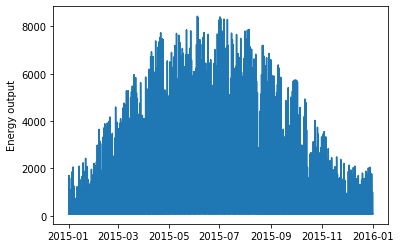

In [27]:
germany_gen = average_pred[0] 
plt.plot(timeseries,germany_gen)
plt.ylabel('Energy output')
energy_production(germany_gen)

Energy Data measured in Giga Watts
Total energy: 11101076.444609584
Average Energy Per Hour: 1267.24616947598
Average Energy Per Day: 30413.90806742352


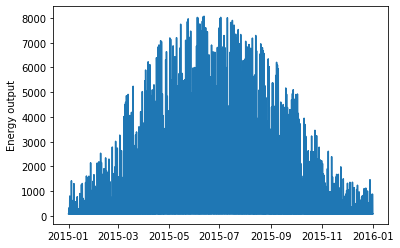

In [28]:
denmark_gen = average_pred[1]
plt.plot(timeseries,denmark_gen)
plt.ylabel('Energy output')
energy_production(denmark_gen)

Energy Data measured in Giga Watts
Total energy: 11508723.021368364
Average Energy Per Hour: 1313.7811668228726
Average Energy Per Day: 31530.74800374894


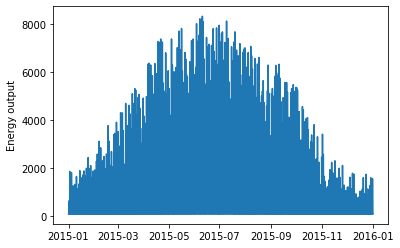

In [29]:
great_britain_gen = average_pred[2]
plt.plot(timeseries,great_britain_gen)
plt.ylabel('Energy output')
energy_production(great_britain_gen)


Energy Data measured in Giga Watts
Total energy: 10053873.438200844
Average Energy Per Hour: 1147.7024472832013
Average Energy Per Day: 27544.858734796835


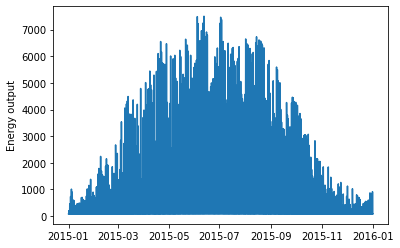

In [30]:
sweden_gen = average_pred[3]
plt.plot(timeseries,sweden_gen)
plt.ylabel('Energy output')
energy_production(sweden_gen)

In [31]:
from sklearn.metrics import r2_score
#print(r2_score(solargenerationtest, prediction))
for i in range(0,4):
    print(str(r2_score(solargentest[i],average_pred[i])) + " r2 score for " + country_list_sol[i])

0.3549455690675061 r2 score for DE
-782.7410249463599 r2 score for DK_1
0.85154607788267 r2 score for GB_GBN
-110323.79418926971 r2 score for SE


In [32]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
for i in range(0,4):
    #print(solargentest[i].shape)
    #print(prediction_list[i].shape)
    print(str(mean_squared_error(solargentest[i],average_pred[i])) + " MSE for " + country_list_sol[i])

23554946.172202677 MSE for DE
4752361.289212043 MSE for DK_1
362166.7671028814 MSE for GB_GBN
4082158.39796256 MSE for SE


In [33]:
#MSE may be extremely high because the data was not yet properly scaled
#R2 score is extremely low for DK_1 and S2, possibly because the scale of the output is entirely different
#Because the output size of GB is so much higher than the rest, it would be necessary to add weights to the average in the future
#This would help us get more accurate data in further iterations

NameError: name 'solargenerationtest' is not defined

In [ ]:
'''
To do:
Figure out mse (maybe normalize)
figure out cross validation fitting
Incorportate more data (more times and more regions)

NN model experimentation

Expand to solar generation
'''